In [4]:
import pandas as pd

comments = pd.read_csv("comments_names_cleaned.csv")
posts = pd.read_csv("posts_names_cleaned.csv")

comments.rename(columns = {"body": "contents"}, inplace = True)

In [3]:
import string

def keyword_match(text: str, keyword: str) -> bool:
    """Match keyword to whole words or whole phrases in text.
    """

    text = text.lower()
    keyword = keyword.lower()

    punctuation = [i for i in string.punctuation] + ["’"]
    punctuation = "".join(punctuation)

    text = text.translate(str.maketrans(punctuation, " "*len(punctuation))) # replace punctuation with spaces

    # print(text)
    def text_subtract(text: str, keyword: str):
        """If keyword is in text, remove it on its first appearance.
        """
        if keyword in text:
            l = text.find(keyword)
            text_list = list(text)
            text_list[l:l+len(keyword)] = ""
            text_subtracted = "".join(text_list)
            return text_subtracted
        else:
            return False

    text_subtracted = text_subtract(text, keyword)
    if text_subtracted:
        if len(text_subtracted.split()) == len(text.split()) - len(keyword.split()):
            return True
    return False

In [57]:
import string

names = ["ranni", "renna", "snow witch", "nepheli", "blaidd", "millicent", "melina", "radahn", "godrick", "margit", "valkyrie", "malenia", "pot boy", "fia", "patches", "jorge", "yakul", "torrent", "hodir", "mimic tear", "rya", "sellen", "alexandar", "alexander", "irina", "latenna", "bloody wolf", "raging wolf"]

mismatches = []
for index, row in comments.iterrows():
    # matched = False
    contents =row.contents

    for name in names:
        matched = False
        if keyword_match(contents, name):
            matched = True
            break
    if matched is False:

        mismatches.append(index)

# mismatches
comments.drop(index=mismatches, inplace=True)
print(f"{len(mismatches)} comments removed.")


19349 comments removed.


In [106]:
df = pd.DataFrame(num_appearance, columns=DATES, index=CHARACTERS)
df.to_csv("num_appearance.csv")

In [4]:
import pandas as pd

df = pd.read_csv("num_appearance.csv", index_col=0)
df.head()



,2019-06-08,2019-06-09,2019-06-10,2019-06-11,2019-06-12,2019-06-13,2019-06-14,2019-06-15,2019-06-16,2019-06-17,...,2022-03-20,2022-03-21,2022-03-22,2022-03-23,2022-03-24,2022-03-25,2022-03-26,2022-03-27,2022-03-28,2022-03-29
ranni,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,32491.0,34061.0,35736.0,37162.0,38594.0,39856.0,39856.0,39856.0,39856.0,39856.0
nepheli,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4351.0,4513.0,4693.0,4934.0,5091.0,5249.0,5249.0,5249.0,5249.0,5249.0
blaidd,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11169.0,11629.0,12131.0,12546.0,12913.0,13307.0,13307.0,13307.0,13307.0,13307.0
millicent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3190.0,3379.0,3600.0,3778.0,4030.0,4297.0,4297.0,4297.0,4297.0,4297.0
melina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12725.0,13190.0,13652.0,14018.0,14421.0,14806.0,14806.0,14806.0,14806.0,14806.0


Drawing with seaborn

In [ ]:
# use bar_char_race to make bar chart race

import bar_chart_race as bcr
import pandas as pd

bcr.bar_chart_race(
    df = df.tail(10),

    filename = "num_appearance.mp4",

    figsize = (26, 15),

    orientation = "h",

    sort = "desc",

    n_bars = 10,

    # smoothness of the animation
    steps_per_period = 45,

    # time period in ms for each row
    period_length = 1500,

    # custom set of colors
    # colors=[
    #     '#6ECBCE', '#FF2243', '#FFC33D', '#CE9673', '#FFA0FF', '#6501E5', '#F79522', '#699AF8', '#34718E', '#00DBCD',
    #     '#00A3FF', '#F8A737', '#56BD5B', '#D40CE5', '#6936F9', '#FF317B', '#0000F3', '#FFA0A0', '#31FF83', '#0556F3'
    # ],

    title = {
        "label": "Number of appearances",
        "size": 52,
        "weight": "bold",
        "pad": 40,
    },

    period_label={
        "x": 0.95, "y": 0.15,
        "ha": "right", "va": "center",
        "size": 72,
        "weight": "semibold",
    },

    bar_label_size = 27,

    tick_label_size = 27,

    bar_kwargs={"alpha": .99, "lw": 0},

)

In [5]:
# convert a wide df to long df, so that we can conveniently visualize it


long_df = df.unstack().reset_index()
long_df.columns = ["date", "character", "num_appearance"]

def capitalize_first_letter(text: str) -> str:
    """Capitalize first letter of text.
    """
    return text.title()

long_df.character = long_df.character.apply(capitalize_first_letter)

long_df.head()

,date,character,num_appearance
0,2019-06-08,Ranni,0.0
1,2019-06-08,Nepheli,0.0
2,2019-06-08,Blaidd,0.0
3,2019-06-08,Millicent,0.0
4,2019-06-08,Melina,0.0


In [75]:
def convert_malenia_to_valkyrie(character: str) -> str:
    """Convert Malenia to Valkyrie.
    """
    if character == "Malenia":
        return "Valkyrie"
    else:
        return character

long_df.character = long_df.character.apply(convert_malenia_to_valkyrie)

In [66]:
# resize all profile pics to be the same size
from PIL import Image
import os.path
import glob

def resize_profile_pic(file: str, width: int = 128, height: int = 128) -> None:
    """Resize profile pic to size.
    """
    path = f"profile_pics/{file}.png"
    img = Image.open(path)
    img = img.resize((width, height), Image.BILINEAR)
    img.save(path)

CHARACTERS = ["ranni", "nepheli", "blaidd", "millicent", "melina", "radahn", "godrick", "margit", "valkyrie", "pot boy", "fia", "patches", "jorge", "torrent", "hodir", "mimic tear", "rya", "sellen", "alexandar", "irina", "latenna", "bloody wolf"]

for character in CHARACTERS:
    resize_profile_pic(character)


/var/folders/c3/kx181pz56w1b4srjcjx18y1c0000gn/T/ipykernel_52866/308114459.py:11: DeprecationWarning: BILINEAR is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.BILINEAR instead.
  img = img.resize((width, height), Image.BILINEAR)


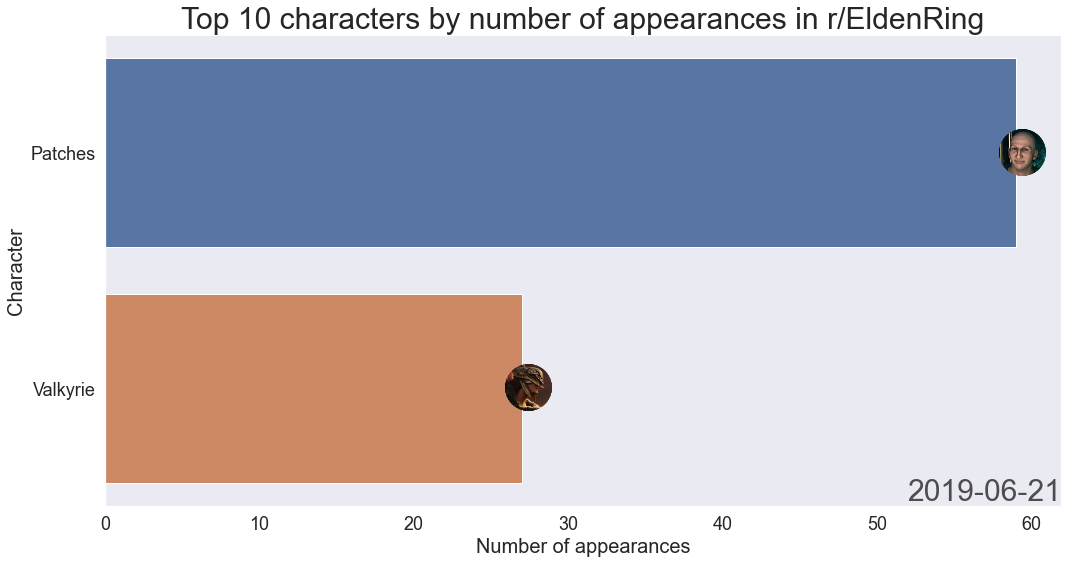

In [157]:
import seaborn as sns
from IPython.display import HTML
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

CHARACTERS = ["ranni", "nepheli", "blaidd", "millicent", "melina", "radahn", "godrick", "margit", "valkyrie", "pot boy", "fia", "patches", "jorge", "torrent", "hodir", "mimic tear", "rya", "sellen", "alexandar", "irina", "latenna", "bloody wolf"]
NUM_ROWS = 10 # number of rows in the plot

fig, ax = plt.subplots(figsize=(15, 8))

sns.set_style("dark")

def draw_barchart(date):
    dff = (long_df.query("date == @date & num_appearance > 0")
       .sort_values("num_appearance", ascending=False)
       .head(NUM_ROWS))

    ax.clear()

    # print date
    ax.text(1, 0, date, fontsize=30, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes, alpha=0.8)

    # print caption for special dates
    # if date == "2020-04-01":
    #     ax.text(1, 0.5, "", fontsize=30, horizontalalignment='left', verticalalignment='top', transform=ax.transAxes, alpha=0.8)

    g = sns.barplot(data = dff, x = "num_appearance", y = "character")


    # show image labels at the end of bar
    for i in range(len(dff)):
        character = dff.iloc[i]["character"]
        img = plt.imread(f"profile_pics/{character}.png")
        
        rect = ax.patches[i]
        x = rect.get_width()
        y = rect.get_y()
        height = rect.get_height()
        x_offset = 25
        im = OffsetImage(img, zoom=0.36)
        ab = AnnotationBbox(im, (x+0.5*height, y+0.5*height), xycoords='data', pad=0.5, frameon=False)
        ax.add_artist(ab)
    

    plt.title("Top 10 characters by number of appearances in r/EldenRing", fontsize = 30)
    plt.xlabel("Number of appearances", fontsize=20)
    plt.ylabel("Character", fontsize=20)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.tight_layout()
    # plt.show(g)

current_date = "2019-06-21"
draw_barchart(current_date)



RuntimeError: Requested MovieWriter (avconv) not available

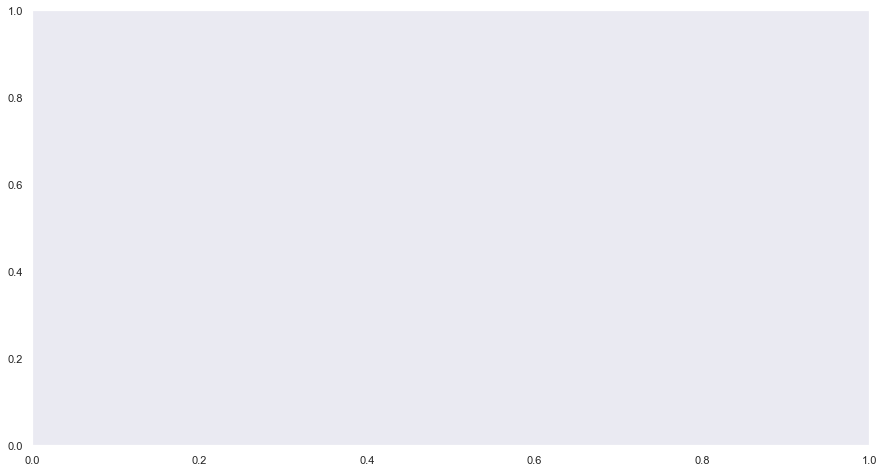

In [187]:
import seaborn as sns
from IPython.display import HTML
import matplotlib.animation as animation
import matplotlib

matplotlib.rcParams['animation.embed_limit'] = 2**128 # increase animation memory limit in MB
matplotlib.rcParams['animation.writer'] = 'avconv'

fig, ax = plt.subplots(figsize=(15, 8))

dates = long_df.date.unique()
# weeks = [dates[i] for i in range(0,len(dates),7)]

animator = animation.FuncAnimation(fig, draw_barchart, frames=dates[:50], cache_frame_data = False)
# writer = animation.FFMpegWriter(fps=10, bitrate=-1)
# animator.save("num_appearance.gif", writer="pillow")
gif = HTML(animator.to_html5_video())
gif


In [184]:
from IPython.core.display import HTML

html = gif.data
with open('html_file.html', 'w') as f:
    f.write(html)

In [186]:
import ffmpeg

In [58]:
comments.to_csv("comments_names_cleaned.csv", index=False)

In [151]:
# writer = animation.PillowWriter(fps=20, codec="libx264", bitrate=2)
animator.to_html5_video(writer = "pillow")

TypeError: Animation.to_html5_video() got an unexpected keyword argument 'writer'

IndexError: list index out of range

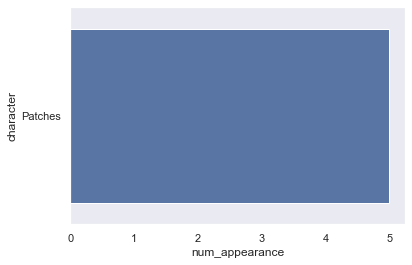

In [153]:
f = "num_appearance.mp4"
writer = animation.PillowWriter(fps=30)
animator.save(f, writer = writer)

In [104]:
posts.sort_values("created_date", ascending=True).head()

,index,id,created_date,contents,score,author,created_utc,url,full_link,title,selftext,upvote_ratio,num_comments
40435,360349,byaeh0,2019-06-08,I hope this game uses From's usual voice actor...,1,TheHeroicOnion,1560015256,1560011656.0,https://www.reddit.com/r/Eldenring/comments/by...,I hope this game uses From's usual voice actor...,Sekiro's English dub is nowhere near as good a...,https://www.reddit.com/r/Eldenring/comments/by...,0
40433,360084,bztzwk,2019-06-12,Patches Who else thinks they will put trusty p...,6,animeboss642,1560360192,1560356592.0,https://www.reddit.com/r/Eldenring/comments/bz...,Patches,Who else thinks they will put trusty patches i...,https://www.reddit.com/r/Eldenring/comments/bz...,1
40432,360062,bzxflj,2019-06-13,"What the trailer shows us about Ragnarok, and ...",2,K2murphy,1560377048,1560373448.0,https://www.reddit.com/r/Eldenring/comments/bz...,"What the trailer shows us about Ragnarok, and ...",Let’s lay some groundwork here. We know that t...,https://www.reddit.com/r/Eldenring/comments/bz...,11
40431,360052,c00ws1,2019-06-13,Valkyrie-esc chick better be a new waifu,38,FlunderDunder,1560397375,1560393775.0,https://www.reddit.com/r/Eldenring/comments/c0...,Valkyrie-esc chick better be a new waifu,NaN,https://i.redd.it/i6ww9ecwo1431.jpg,14
40430,359965,c10ga9,2019-06-15,Eldenring wishlist! This is by no means a comp...,16,Transbian-swagger,1560623288,1560619688.0,https://www.reddit.com/r/Eldenring/comments/c1...,Eldenring wishlist!,This is by no means a complete list but with F...,https://www.reddit.com/r/Eldenring/comments/c1...,25


Data for animation

In [89]:
import numpy as np

NAMES = ["ranni", "renna", "snow witch", "nepheli", "blaidd", "millicent", "melina", "radahn", "godrick", "margit", "valkyrie", "malenia", "pot boy", "fia", "patches", "jorge", "yakul", "torrent", "hodir", "mimic tear", "rya", "sellen", "alexandar", "alexander", "irina", "latenna", "bloody wolf", "raging wolf"]

CHARACTERS = ["ranni", "nepheli", "blaidd", "millicent", "melina", "radahn", "godrick", "margit", "malenia", "pot boy", "fia", "patches", "jorge", "torrent", "hodir", "mimic tear", "rya", "sellen", "alexandar", "irina", "latenna", "bloody wolf"]
ALIAS = {
    "ranni": ["ranni", "renna", "snow witch"],
    "malenia": ["valkyrie", "malenia"],
    "torrent": ["yakul", "torrent"],
    "alexandar": ["alexandar", "alexander"],
    "bloddy wolf": ["bloody wolf", "raging wolf"],
}

start_date = "2019-06-08"
end_date = "2022-03-29"
DATES = pd.date_range(start_date, end_date, freq="D").strftime('%Y-%m-%d').tolist() # get list of dates

num_appearance = np.zeros((len(CHARACTERS), len(DATES)))

In [90]:
for row in posts.itertuples():
    for character in CHARACTERS:
        if character in ALIAS:
            for alias in ALIAS[character]:
                if keyword_match(row.contents, alias):
                    num_appearance[CHARACTERS.index(character), DATES.index(row.created_date)] += 3
        else:
            if keyword_match(row.contents, character):
                num_appearance[CHARACTERS.index(character), DATES.index(row.created_date)] += 3

for row in comments.itertuples():
    for character in CHARACTERS:
        if character in ALIAS:
            for alias in ALIAS[character]:
                if keyword_match(row.body, alias):
                    num_appearance[CHARACTERS.index(character), DATES.index(row.created_date)] += 1
        else:
            if keyword_match(row.body, character):
                num_appearance[CHARACTERS.index(character), DATES.index(row.created_date)] += 1



In [100]:
for i in range(len(CHARACTERS)):
    appearance = 0
    for j in range(len(DATES)):
        appearance += num_appearance[i, j]
        num_appearance[i, j] = appearance

num_appearance

array([[    0.,     0.,     0., ..., 39856., 39856., 39856.],
       [    0.,     0.,     0., ...,  5249.,  5249.,  5249.],
       [    0.,     0.,     0., ..., 13307., 13307., 13307.],
       ...,
       [    0.,     0.,     0., ...,  1591.,  1591.,  1591.],
       [    0.,     0.,     0., ...,  1000.,  1000.,  1000.],
       [    0.,     0.,     0., ...,  2110.,  2110.,  2110.]])

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [87]:
num_appearance[0,1] += 2
num_appearance

array([[0., 2., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [62]:
"ranni" in ALIAS

True

In [205]:
text = """
Did I miss something?  Unfortunately I'm a bit confused right now. I played the game with my first character up to the mimic boss.

I've been playing a new character for a few days, but somehow it's all strange, for example with my first character I was with Renna, who then sent me down to Blaidd, that's when I met him for the first time, he gave me an order.  

But with my 2nd char it was strange, before I arrived at Renna, I defeated this Radahn, only that was strange, when I rode to this fortress there were no Fire catapults shooting at me and there were no opponents in the fortress either, with mine first char were opponents and also catapults AND before Radahn I had to fight against two Bpsse at the same time, it was such a dog and a strong knight.

With my second, they weren't there, I was able to activate the light right away and the celebration began, that's when I met Blaidd for the first time with my 2nd char. But then I advanced to Rena and Blaidd was no longer there, and the Great Ruins door to these giant smiths was closed, had to ride around the outside.

 I'm now wondering why this is so, what did I overlook with my 2nd char that some paths were blocked and even some NPCs didn't even appear.  

&amp;#x200B;

Sorry for my english. 
"""

keyword_match(text, "renna")

False

In [200]:
text = "text b c"
keyword = "b c"

def keyword_match(text, keyword):
    if keyword in text:
        text_subtracted = text.replace(keyword, "")
        if len(text_subtracted.split()) == len(text.split()) - len(keyword.split()):
            return True
    return False

keyword_match(text, keyword)

True

In [14]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
import pandas as pd

[nltk_data] Downloading package punkt to /Users/jersey/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/jersey/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [4]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [155]:
from typing import List
# freq = nlp(test).ents
# freq
# freq.most_common(10)

import pandas as pd

posts = pd.read_csv("posts_processed.csv")
sample = posts.query("created_date >= '2020-12-05' and created_date <= '2020-12-12'")

def entity_frequency_of_text(text: str) -> dict:
    """get the frequency of each entity in a text
    """
    freq = [str(entity) for entity in nlp(text).ents]
    return {entity:freq.count(entity) for entity in freq}


def entity_of_text(text: str) -> List:
    """get the unique entities in a text"""
    freq = set([str(entity) for entity in nlp(text).ents])
    return list(freq)

sample.head()


/var/folders/c3/kx181pz56w1b4srjcjx18y1c0000gn/T/ipykernel_7630/3742461862.py:8: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  posts = pd.read_csv("posts_processed.csv")


,id,created_date,contents,score,author,created_utc,url,full_link,title,selftext,upvote_ratio,num_comments
335591,kbyxgc,2020-12-12,Jeff Grubb's journey with Elden Ring,1,fantalas,1607813732,https://i.redd.it/1t2hrn846u461.png,https://www.reddit.com/r/Eldenring/comments/kb...,Jeff Grubb's journey with Elden Ring,NaN,1.0,20
335592,kbyuco,2020-12-12,OOOOoooOOHHH,1,ownjer,1607813418,https://i.redd.it/p161kwi45u461.png,https://www.reddit.com/r/Eldenring/comments/kb...,OOOOoooOOHHH,NaN,1.0,4
335593,kbys4u,2020-12-12,OOOOOOOOOHHHH,1,AmericanBadazz69,1607813201,https://i.redd.it/skvjoful4u461.jpg,https://www.reddit.com/r/Eldenring/comments/kb...,OOOOOOOOOHHHH,NaN,1.0,0
335594,kbyo8o,2020-12-12,"When you’ve been disappointed at every turn, e...",1,Milesrah,1607812841,https://i.redd.it/8eimipaj3u461.jpg,https://www.reddit.com/r/Eldenring/comments/kb...,"When you’ve been disappointed at every turn, e...",NaN,1.0,5
335595,kbyis2,2020-12-12,If you need me I’ll be here waiting for a Stat...,1,marblerye69,1607812311,https://i.redd.it/0ejxhqly1u461.jpg,https://www.reddit.com/r/Eldenring/comments/kb...,If you need me I’ll be here waiting for a Stat...,NaN,1.0,3


In [174]:
import sqlite3
import pandas as pd

conn = sqlite3.connect('eldenRing.db')
q = """
SELECT * FROM posts
where created_date between '2019-09-22' and  '2019-09-24'
order by score desc
"""

q1 = """
select * from comments
where body like '%Glaive Master Hodir%'
order by created_date 

"""
sample = pd.read_sql(q, conn)
sample.head()
# df["contents"].values

,index,id,created_date,contents,score,author,created_utc,url,full_link,title,selftext,upvote_ratio,num_comments
0,359098,d7w5b0,2019-09-22,Breaker of the Elden Ring Confirmed?,492,dtquin16,1569184574,1569180974.0,https://www.reddit.com/r/Eldenring/comments/d7...,Breaker of the Elden Ring Confirmed?,None,https://i.redd.it/vmui8n6vh7o31.jpg,20
1,359055,d8qjth,2019-09-24,Must be tough for Miazaki,476,Anartistnamedshea,1569346636,1569343036.0,https://www.reddit.com/r/Eldenring/comments/d8...,Must be tough for Miazaki,None,https://imgur.com/OrcaUNt,8
2,359087,d87svo,2019-09-23,"Hey Miyazaki, ya got some more elden ring teas...",449,ViktorTheCow,1569251339,1569247739.0,https://www.reddit.com/r/Eldenring/comments/d8...,"Hey Miyazaki, ya got some more elden ring teas...",None,https://i.redd.it/mnqjs76e0do31.jpg,14
3,359104,d7k79u,2019-09-22,This sub waiting for someone or something to f...,447,sincerely_hated,1569117602,1569114002.0,https://www.reddit.com/r/Eldenring/comments/d7...,This sub waiting for someone or something to f...,None,https://i.redd.it/7v6c0b7qy1o31.jpg,14
4,359073,d8m8xp,2019-09-24,Please Miyazaki,364,KailReed,1569326965,1569323365.0,https://www.reddit.com/r/Eldenring/comments/d8...,Please Miyazaki,None,https://imgur.com/drv6rg8,24


In [173]:
sample.contents.values

array(['When we encounter our first boss fight ',
       'My list of Elden Ring bosses ranked from easiest to hardest. Part 1 Hey all since Elden ring has been out for 8 months now Ive pretty much explored every nook and cranny in the game and have played NG+ a few times and since we got the announcement of Bloodborne 2 I figured ill put this list up like I do with all the other Soulsborne games. So ill start in order with the easiest bosses to the hardest. Note that this os only part 1 where I do the first 9 bosses, Ill do the last 7 in a second part because those rankings might be more controversial.\n\n1.  Glaive Master Hodir- The most easiest pathetic boss of this game. I mean I dont really know if you wanna classify him as a real boss even though he had a big health pool. All you had to do was dodge or parry his easy telegraphed glaive sweeps and go in and do some heavy attacks. His back would be turned for a few seconds and some probably used a health flask because of some easy m

In [170]:
# sample = posts.query("created_date >= '2020-12-05' and created_date <= '2020-12-12'")
entities = []
for row in sample.itertuples():
    entities = entities + entity_of_text(row.contents)


In [171]:
# {i:entities.count(i) for i in entities}
pd.DataFrame.from_dict({i:entities.count(i) for i in entities}, orient="index", columns=["freq"]).sort_values(by="freq", ascending=False).head(10)


,freq
Hodir,11
Miyazaki,6
one,6
2,4
first,4
second,3
6,3
Elden,3
5,2
Soulsborne,2


In [110]:
sample.head()

,author,body,created_date,created_utc,id,parent_id,permalink,score
5071808,Xvexe,OOOOOOOHHH ELDEN BABE,2020-11-07,1604789890,gbidkvl,jpw7jq,/r/Eldenring/comments/jpw7jq/this_worked_for_d...,17.0
5071809,fastfirechris,Idc if your left or right don’t bring bs polit...,2020-11-07,1604789855,gbidgzx,jpi3od,/r/Eldenring/comments/jpi3od/which_will_come_f...,1.0
5071810,cheersfrom_,I remember him speaking on something awhile ba...,2020-11-07,1604789727,gbid2gm,jpv59j,/r/Eldenring/comments/jpv59j/actual_update_luk...,3.0
5071811,cloudsheep0,Yeah it did here's the thread:\n\nhttps://stea...,2020-11-07,1604789717,gbid1dh,jpw7jq,/r/Eldenring/comments/jpw7jq/this_worked_for_d...,24.0
5071812,Nasunon,the madlads actually release the game that day,2020-11-07,1604789708,gbid0cj,jpw7jq,/r/Eldenring/comments/jpw7jq/this_worked_for_d...,45.0


In [105]:
list(sample["body"])[:10]

['[removed]',
 "idk what conspiracy theories you've been reading but it got delayed because of current gen systems holding them back. They have to test the games on the Xbox One and PS4 and making sure it's optimized enough. PC and Next gen consoles are ready to be played although. But what would TGA say about cyberpunk other than it comes out today? Cyberpunk can't be nominated for anything lol, it literally comes out on the day of TGA. If they delayed it again on purpose , then surely the 25% stock drop was what they wanted? Also how is this related to Elden Ring again",
 'no, you are breathtaking!',
 'Hopefully the level up waifu has multiple arms. Because you know what that means...',
 'nah that was supposed to be a knife. :D',
 'Yeah you are actually right, I have a habit of messing up the countdown due to my irregular posting schedule as of right now. I am trying to get it on track. :/\n\nBut thanks! I will correct it.',
 "The game has been stated to be doing good several months 

In [99]:
sample.head()

,author,body,created_date,created_utc,id,parent_id,permalink,score
5074588,[deleted],[removed],2020-11-01,1604271435,gau9emy,jm63mt,/r/Eldenring/comments/jm63mt/can_we_take_a_mom...,1.0
5074589,Rohn-,idk what conspiracy theories you've been readi...,2020-11-01,1604271037,gau8n7m,jm01hg,/r/Eldenring/comments/jm01hg/prediction_predic...,1.0
5074590,stray_demon,"no, you are breathtaking!",2020-11-01,1604271014,gau8lnu,jk59fa,/r/Eldenring/comments/jk59fa/45_days_till_tga_...,1.0
5074591,whitesnorlax,Hopefully the level up waifu has multiple arms...,2020-11-01,1604270986,gau8jv5,jmb9fv,/r/Eldenring/comments/jmb9fv/multiple_armed_bo...,1.0
5074592,stray_demon,nah that was supposed to be a knife. :D,2020-11-01,1604270978,gau8jel,jk59fa,/r/Eldenring/comments/jk59fa/45_days_till_tga_...,1.0


In [49]:

{i:freq.count(i) for i in freq}

{'Apprentice Eichoberin': 1,
 'Glaive Master': 1,
 'Hodir': 6,
 'Church Grim': 1,
 'Arena': 1,
 'the Frozen Forest': 1,
 'about 10%': 1,
 'The Frozen Forest': 1,
 '2': 1,
 'Elden': 1,
 'AOE': 2,
 'second': 1,
 '3': 1}

In [48]:
freq = [str(i) for i in freq]
freq

['Apprentice Eichoberin',
 'Glaive Master',
 'Hodir',
 'Church Grim',
 'Arena',
 'Hodir',
 'the Frozen Forest',
 'about 10%',
 'The Frozen Forest',
 '2',
 'Elden',
 'Hodir',
 'Hodir',
 'Hodir',
 'Hodir',
 'AOE',
 'AOE',
 'second',
 '3']

In [125]:
sample["body"].values

array(['woop woop?', 'Oh my god... THATS TODAY',
       "It's strange man. I mean, I recently went back to all the trailers for their previous games and its really surprising to see how many things were changed. In addition, if you look at the all the cut content you really notice and appreciate the scope and what they were going for and how late in development they had to scrape such great ideas. So I'd rather have them finalize shit and then show it, but I see what you mean",
       ...,
       'Depends how big the section is but yeah, too much would be a bad idea, but I definitely would like for there to be lakes to swim and dive in to find treasures and such, even if they lacked more complex combat encounters like boss fights.',
       'Ayo this is wholesome',
       '"if it sucks dont put it in the game" can defend any idea really, i just never see underwater combat thats enjoyable enough to dedicate an entire portion of the game to it. sekiros underwater combat was alright, but h

In [176]:
import nltk
from nltk import everygrams
nltk.download('stopwords')
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

stop_words = set(stopwords.words('english'))
texts = sample["contents"].values
texts = [text.translate(str.maketrans('', '', string.punctuation)) for text in texts]

texts_nonstop = []
for text in texts:
    texts_nonstop.append(" ".join([word.lower() for word in text.split() if word.lower() not in stop_words]))
# texts = [' '.join([word for word in text.split() if word not in stop_words]) for text in texts)]

# texts_nonstop[:30]


word_tokens = word_tokenize(" ".join(texts_nonstop))

filtered_sentence = [w for w in word_tokens]

# print(filtered_sentence)

ngrams = Counter(everygrams(filtered_sentence, max_len=3))

# ngrams = Counter(nltk.ngrams(filtered_sentence, 3))
ngrams.most_common(50)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/jersey/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[(('boss',), 29),
 (('like',), 28),
 (('game',), 26),
 (('’',), 24),
 (('hodir',), 23),
 (('elden',), 22),
 (('ring',), 22),
 (('elden', 'ring'), 21),
 (('glaive',), 20),
 (('master',), 18),
 (('think',), 17),
 (('glaive', 'master'), 16),
 (('master', 'hodir'), 16),
 (('know',), 15),
 (('glaive', 'master', 'hodir'), 14),
 (('got',), 13),
 (('one',), 13),
 (('fight',), 12),
 (('guys',), 12),
 (('souls',), 12),
 (('miyazaki',), 11),
 (('get',), 11),
 (('dark',), 11),
 (('dont',), 10),
 (('would',), 10),
 (('dark', 'souls'), 10),
 (('see',), 10),
 (('first',), 9),
 (('really',), 9),
 (('way',), 9),
 (('im',), 9),
 (('something',), 8),
 (('gameplay',), 8),
 (('bosses',), 8),
 (('since',), 8),
 (('2',), 8),
 (('back',), 8),
 (('feel',), 8),
 (('’', 't'), 8),
 (('t',), 8),
 (('cant',), 8),
 (('soulsborne',), 7),
 (('time',), 7),
 (('attacks',), 7),
 (('hard',), 7),
 (('could',), 7),
 (('’', 's'), 7),
 (('s',), 7),
 (('help',), 7),
 (('good',), 7)]

In [145]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

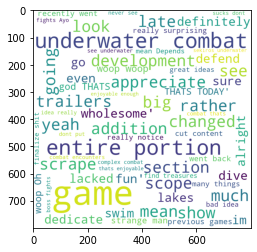

In [135]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

texts = sample["body"].values

wordcloud = WordCloud(width=800, height=800, stopwords=STOPWORDS, background_color='white', collocation_threshold=False).generate(str(texts))
plt.imshow(wordcloud)

In [136]:
wordcloud.words_

{'game': 1.0,
 'underwater combat': 1.0,
 'entire portion': 1.0,
 'mean': 0.5,
 'trailers': 0.5,
 'see': 0.5,
 'changed': 0.5,
 'addition': 0.5,
 'look': 0.5,
 'appreciate': 0.5,
 'scope': 0.5,
 'going': 0.5,
 'late': 0.5,
 'development': 0.5,
 'scrape': 0.5,
 'rather': 0.5,
 'show': 0.5,
 'big': 0.5,
 'section': 0.5,
 'yeah': 0.5,
 'much': 0.5,
 'definitely': 0.5,
 'lakes': 0.5,
 'swim': 0.5,
 'dive': 0.5,
 'even': 0.5,
 'lacked': 0.5,
 "wholesome'": 0.5,
 'defend': 0.5,
 'dedicate': 0.5,
 'alright': 0.5,
 'go': 0.5,
 'im': 0.5,
 'sure': 0.5,
 "fun'": 0.5,
 'woop woop': 0.5,
 'woop Oh': 0.5,
 'god THATS': 0.5,
 "THATS TODAY'": 0.5,
 'strange man': 0.5,
 'recently went': 0.5,
 'went back': 0.5,
 'previous games': 0.5,
 'really surprising': 0.5,
 'many things': 0.5,
 'cut content': 0.5,
 'really notice': 0.5,
 'great ideas': 0.5,
 'finalize shit': 0.5,
 'mean Depends': 0.5,
 'bad idea': 0.5,
 'find treasures': 0.5,
 'complex combat': 0.5,
 'combat encounters': 0.5,
 'boss fights': 0.5,


In [ ]:
wordcloud.

In [120]:
a = set([1,2])
a.append([3,4])
a

AttributeError: 'set' object has no attribute 'append'

In [23]:
str(" ".join(filtered_sentence))[0]

'A'

In [9]:
df = pd.read_csv("posts_processed.csv")
sample = df[df["created_date"]=="2019-11-01"]

/var/folders/c3/kx181pz56w1b4srjcjx18y1c0000gn/T/ipykernel_50764/174416916.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("posts_processed.csv")


In [10]:
sample = sample["contents"].tolist()
sample[:3]

["How do you use the Eye of Rindya? I used it at the entrance to the Gerah's Mines but nothing happened",
 "Apprentice Eichoberin, The frozen forest and how to get there. So, guys, I've managed to go through the frozen forest area which is hidden behind Glaive Master Hodir's arena. For those who don't know how to get into the frozen forest, you need to use the power of the cross you obtained from the Church Grim boss fight in the Hodir's Arena. Normally attempting to resurrect a boss it would give you an item that cannot be used but does contain a lore tablet for the boss. However when I tried to get Hodir's item,  however, in this case, it temporarily resurrected him and it initiated a cutscene where he grabbed me, tossed me up in the air and throws his glaive at me launching me into the air off into the area known as the Frozen Forest. I woke up with about 10% hp and my only weapon on me being Hodir's Glaive. The Frozen Forest is a large open area with an actually fair version of the

In [15]:
def preprocess(sent):
    sent = nltk.word_tokenize(sent)
    sent = nltk.pos_tag(sent)
    return sent

sent = preprocess(sample[0])
sent

[('How', 'WRB'),
 ('do', 'VB'),
 ('you', 'PRP'),
 ('use', 'VB'),
 ('the', 'DT'),
 ('Eye', 'NNP'),
 ('of', 'IN'),
 ('Rindya', 'NNP'),
 ('?', '.'),
 ('I', 'PRP'),
 ('used', 'VBD'),
 ('it', 'PRP'),
 ('at', 'IN'),
 ('the', 'DT'),
 ('entrance', 'NN'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('Gerah', 'NNP'),
 ("'s", 'POS'),
 ('Mines', 'NNS'),
 ('but', 'CC'),
 ('nothing', 'NN'),
 ('happened', 'VBD')]

In [20]:
import numpy
from sklearn.feature_extraction.text import CountVectorizer
z

mod1 = CountVectorizer(ngram_range=(1, 2))
mod1.fit(sample)
mod1.transform(corpus).todense()

ModuleNotFoundError: No module named 'sklearn'

In [177]:
conn = sqlite3.connect('eldenRing.db')
q = """
select min(created_date) from posts
"""
conn.execute(q).fetchone()

('2019-06-08',)